<a href="https://colab.research.google.com/github/PRANAVSATHYAN/PRANAVSATHYAN/blob/main/Trading_Automation_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ✅ STEP 1: Install required packages (if not installed)
!pip install yfinance ta

In [ ]:
# ✅ STEP 2: Import libraries
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import ta
from datetime import datetime

In [ ]:
# ✅ STEP 3: Set the date range (daily data from 2023 to today)
today = datetime.today().strftime('%Y-%m-%d')

In [ ]:
# Pull daily data from January 2023 to today (EUR/USD)
symbol = 'EURUSD=X'  # Yahoo Finance symbol for EUR/USD
df = yf.download(symbol, start="2023-01-01", end=today, interval='1d')  # 1-day data

[*********************100%***********************]  1 of 1 completed


In [ ]:
# ✅ STEP 4: Calculate 9 and 21 EMAs
df['EMA9'] = ta.trend.ema_indicator(close=df['Close'].squeeze(), window=9)  # Ensuring 1D array
df['EMA21'] = ta.trend.ema_indicator(close=df['Close'].squeeze(), window=21)



In [ ]:
# ✅ STEP 5: Generate buy/sell signals
df['Signal'] = 0
df.loc[df['EMA9'] > df['EMA21'], 'Signal'] = 1  # Buy
df.loc[df['EMA9'] < df['EMA21'], 'Signal'] = -1  # Sell
df['Position'] = df['Signal'].shift(1)

In [ ]:
# ✅ STEP 6: Calculate returns
df['Returns'] = df['Close'].pct_change()
df['Strategy'] = df['Returns'] * df['Position']

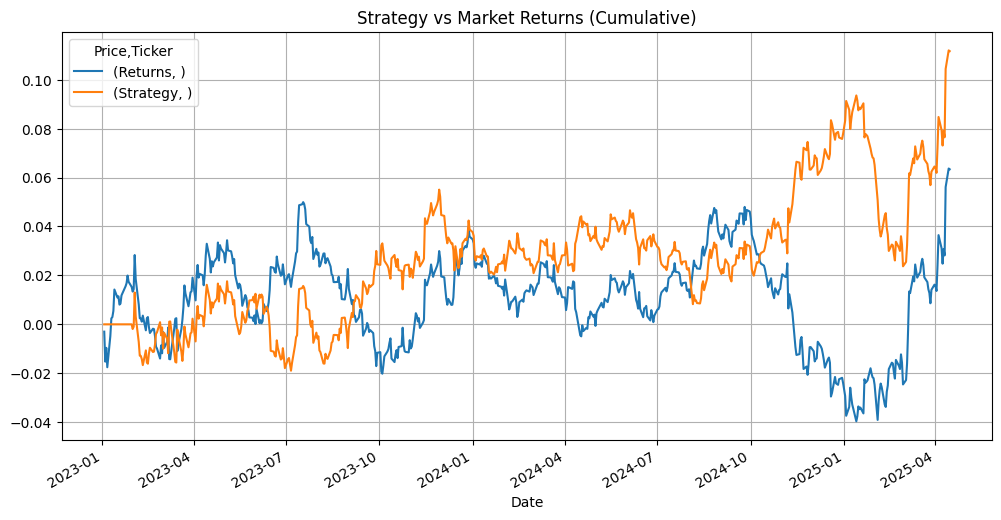

In [ ]:
# ✅ STEP 7: Plot performance
df[['Returns', 'Strategy']].cumsum().plot(figsize=(12, 6))
plt.title("Strategy vs Market Returns (Cumulative)")
plt.grid()
plt.show()

In [ ]:
# ✅ Optional: Print final stats
final_returns = df[['Returns', 'Strategy']].cumsum().iloc[-1]
print("Final Cumulative Market Return:", round(final_returns['Returns'], 4))
print("Final Cumulative Strategy Return:", round(final_returns['Strategy'], 4))

Final Cumulative Market Return: Ticker
    0.0634
Name: 2025-04-15 00:00:00, dtype: float64
Final Cumulative Strategy Return: Ticker
    0.1116
Name: 2025-04-15 00:00:00, dtype: float64
